In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Initial Analysis

In [133]:
df=pd.read_csv("Data/train.csv")

In [134]:
df.shape

(891, 12)

In [135]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [136]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Remove unwanted columns

In [137]:
df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [138]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [139]:
df.shape

(891, 8)

## Handle Missing Values

In [140]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [142]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [143]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

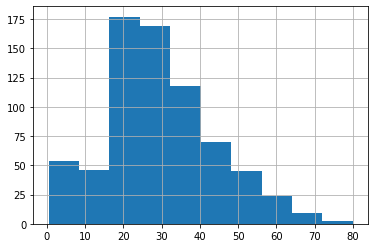

In [144]:
df['Age'].hist()

<AxesSubplot:>

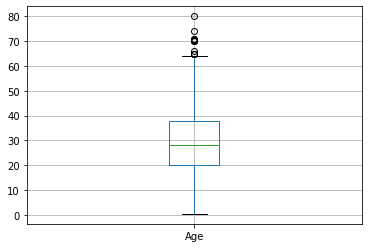

In [145]:
df.boxplot('Age')

In [146]:
df['Age'].mean()

29.69911764705882

In [147]:
df['Age'].median()

28.0

In [148]:
df['Age'].mode()

0    24.0
dtype: float64

In [149]:
mode_val=df['Age'].mode()[0]
df['Age'].fillna(value=mode_val,inplace=True)

In [150]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

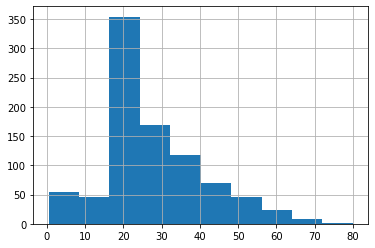

In [151]:
df['Age'].hist()


In [152]:
df['Embarked'].mode()

0    S
dtype: object

In [153]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [154]:
mode_val=df['Embarked'].mode()[0]
df['Embarked'].fillna(value=mode_val,inplace=True)
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Split dependent & independent variables in different dataframes

In [155]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [156]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [157]:
x.shape,y.shape

((891, 7), (891,))

In [158]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [159]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [160]:
x.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### convert integer varaibles to object

In [161]:
x['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [162]:
x['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [163]:
x['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [164]:
x=x.astype({'Pclass':'object','SibSp':'object','Parch':'object'})

In [165]:
x.dtypes

Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Embarked     object
dtype: object

## Create dummies for object/categorical variables

In [166]:
x=pd.get_dummies(x)

In [167]:
x.isnull().sum()

Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [168]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=101,stratify=y,test_size=0.25)

In [169]:
train_y.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [170]:
test_y.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [171]:
train_x.shape,train_y.shape

((668, 24), (668,))

In [172]:
test_x.shape,test_y.shape

((223, 24), (223,))

In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [174]:
dt_model=DecisionTreeClassifier(random_state=10)

In [175]:
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(random_state=10)

In [176]:
dt_model.score(train_x,train_y)

0.9880239520958084

In [177]:
dt_model.score(test_x,test_y)

0.7399103139013453

In [178]:
dt_model.predict(test_x)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [179]:
dt_model.predict_proba(test_x)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [180]:
pred_y=dt_model.predict_proba(test_x)[:,1]

In [181]:
new_y=[]
for i in range(len(pred_y)):
    if pred_y[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)


In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,new_y)

0.7399103139013453

### changing max depth

In [183]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt_model.fit(train_x,train_y)
    train_accuracy.append(dt_model.score(train_x,train_y))
    test_accuracy.append(dt_model.score(test_x,test_y))


In [184]:
frame=pd.DataFrame({
    'max_depth':range(1,10),
    'train_accuracy':train_accuracy,
    'test_accuracy':test_accuracy
})
frame.head()

,max_depth,train_accuracy,test_accuracy
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.850299,0.771300
4,5,0.850299,0.771300


No handles with labels found to put in legend.


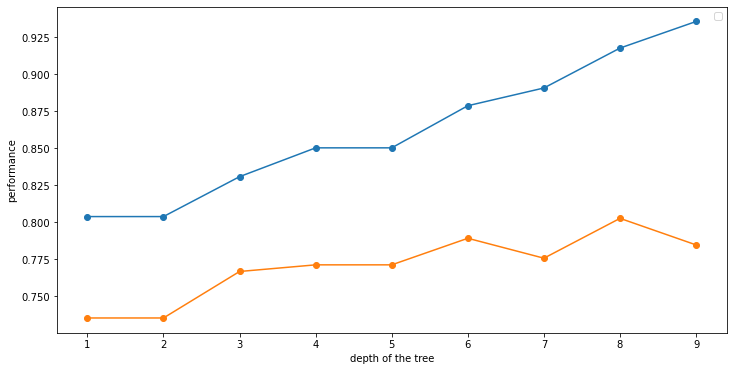

In [185]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_accuracy'],marker='o')
plt.plot(frame['max_depth'],frame['test_accuracy'],marker='o')
plt.xlabel('depth of the tree')
plt.ylabel('performance')
plt.legend()

optimum value for max_depth =8

In [186]:
train_accuracy=[]
test_accuracy=[]
for lnode in range(2,100):
    dt_model=DecisionTreeClassifier(max_leaf_nodes=lnode,max_depth=8,random_state=10)
    dt_model.fit(train_x,train_y)
    train_accuracy.append(dt_model.score(train_x,train_y))
    test_accuracy.append(dt_model.score(test_x,test_y))



In [187]:
frame=pd.DataFrame({
    'Leaf_Node': range(2,100),
    'train_accuracy': train_accuracy,
    'test_accuracy':test_accuracy
})
frame.head()

,Leaf_Node,train_accuracy,test_accuracy
0,2,0.803892,0.735426
1,3,0.803892,0.735426
2,4,0.826347,0.762332
3,5,0.826347,0.762332
4,6,0.830838,0.766816


No handles with labels found to put in legend.


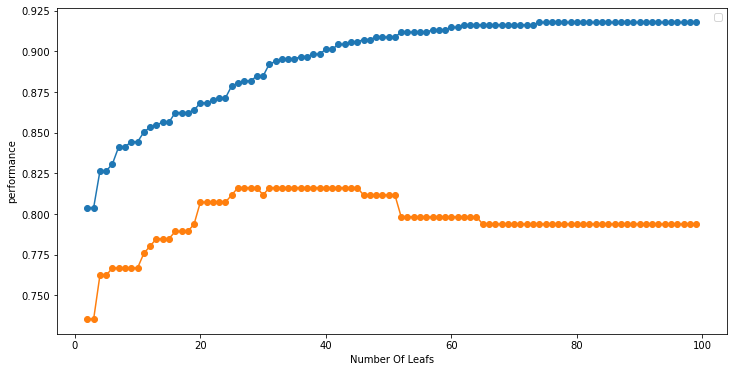

In [188]:
plt.figure(figsize=(12,6))
plt.plot(frame['Leaf_Node'],frame['train_accuracy'],marker='o')
plt.plot(frame['Leaf_Node'],frame['test_accuracy'],marker='o')
plt.xlabel('Number Of Leafs')
plt.ylabel('performance')
plt.legend()

optimum value 25 for leaf nodes

In [189]:
    dt_model=DecisionTreeClassifier(max_leaf_nodes=25,max_depth=8,random_state=10)


In [190]:
dt_model.fit(train_x,train_y)


DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [191]:
dt_model.score(train_x,train_y)

0.8787425149700598

In [192]:
dt_model.score(test_x,test_y)

0.8116591928251121